In [1]:
from sklearn.datasets.samples_generator import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

C:\Anaconda3\envs\nlpiaenv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

In [3]:
# one hot encode output variable
y = to_categorical(y)

In [4]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [5]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [6]:
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [7]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0,batch_size=1)

In [8]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

In [9]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.830, Test: 0.824


In [ ]:
'''The reported performance is greatly improved, achieving classification accuracy on the train
and test sets on par with using batch gradient descent.'''

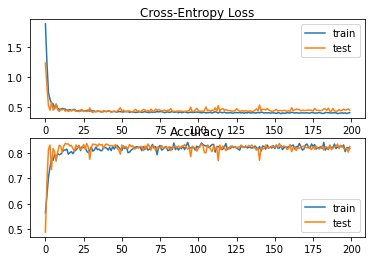

In [10]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
'''The line plot shows the expected behavior. Namely, that the model rapidly learns the
problem as compared to batch gradient descent, leaping up to about 80% accuracy in about
25 epochs rather than the 100 epochs seen when using batch gradient descent. We could have
stopped training at epoch 50 instead of epoch 200 due to the faster training. This is not
surprising. With batch gradient descent, 100 epochs involved 100 estimates of error and 100
weight updates. In stochastic gradient descent, 25 epochs involved (500  25) or 12,500 weight
updates, providing more than 10-times more feedback, albeit more noisy feedback, about how
to improve the model.'''

In [ ]:
'''The line plot also shows that train and test performance remain comparable during training,
as compared to the dynamics with batch gradient descent where the performance on the test
set was slightly better and remained so throughout training. Unlike batch gradient descent, we
can see that the noisy updates result in noisy performance throughout the duration of training.
This variance in the model means that it may be challenging to choose which model to use as
the final model, as opposed to batch gradient descent where performance is stabilized because
the model has converged.'''

In [ ]:
# Batch Gradient Descent: Use a relatively larger learning rate and more training epochs.


In [ ]:
# Stochastic Gradient Descent: Use a relatively smaller learning rate and fewer training epochs.